
# Cell segmentation tutorial


In [1]:
pip install lazyslide

INFO: pip is looking at multiple versions of ome-zarr to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.4/171.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.3/185.3 kB 20.2 MB/s eta 0:00:00
   ━━━━━

In [2]:
pip install tiffslide

/usr/lib/python3.12/importlib/__init__.py:90: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  return _bootstrap._gcd_import(name[level:], package, level)
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


lung_carcinoma.ndpi:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

WSI: /root/.cache/huggingface/hub/datasets--RendeiroLab--LazySlide-data/snapshots/61b923cd2be1e50ed7116ecb93de47b8b4a5c947/lung_carcinoma.ndpi
Reader: openslide
Dimensions: 15616×16384 (h×w), 8 Pyramids
Pixel physical size: 0.22731405710129116 MPP
SpatialData object
└── Images
      └── 'wsi_thumbnail': DataArray[cyx] (3, 1817, 1906)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images)
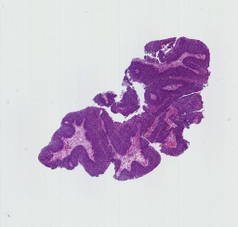

In [3]:
import lazyslide as zs
wsi = zs.datasets.lung_carcinoma(with_data=False)
wsi

In [4]:
zs.pp.find_tissues(wsi)
zs.pp.tile_tissues(wsi, 560, overlap=0.2, background_fraction=0.95, mpp=0.5)

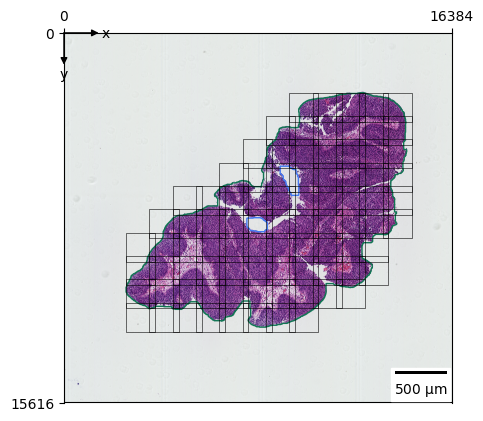

In [5]:
zs.pl.tiles(wsi, linewidth=0.4)

# Cell Segmentation

In [6]:
zs.seg.cells(wsi, batch_size=32)

instanseg/instanseg_v0_1_0.pt:   0%|          | 0.00/15.8M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/lazyslide/segmentation/_cell.py:72: UserWarning: To optimize the performance of Instanseg model, the tile size should be 512x512 and the mpp should be 0.5. Current tile size is 560x560 with 0.5 mpp.
  warnings.warn(


Output()

<Axes: >

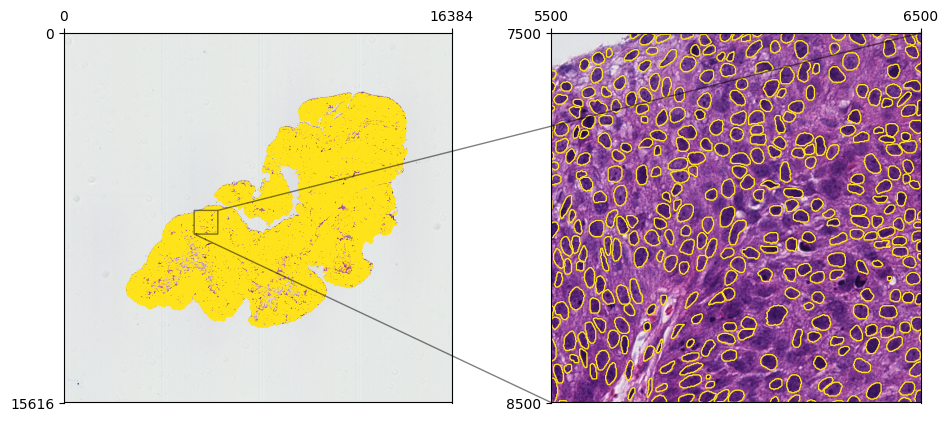

In [7]:
v = zs.pl.WSIViewer(wsi)
v.add_image()
v.add_polygons("cells", linewidth=1, fill=False)
v.add_zoom(5500, 6500, 7500, 8500)
v.show()

In [13]:
!huggingface-cli login

⚠️  Warning: 'huggingface-cli login' is deprecated. Use 'hf auth login' instead.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) 
Token is valid (permission: write).
The token `my_conch_downloader_giovanni` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate thr

In [15]:
!huggingface-cli download --resume-download Owkin-Bioptimus/histoplus


⚠️  Warning: 'huggingface-cli download' is deprecated. Use 'hf download' instead.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Fetching 5 files:   0% 0/5 [00:00<?, ?it/s]Downloading 'histoplus_cellvit_segmentor_40x.pt' to '/root/.cache/huggingface/hub/models--Owkin-Bioptimus--histoplus/blobs/9cccb30d3d73535535bcec0e6d7f322a8ee1be1584bde13a558cf0a5d352ea5c.incomplete'

histoplus_cellvit_segmentor_40x.pt:   0% 0.00/286M [00:00<?, ?B/s]

histoplus_cellvit_segmentor_20x.pt:   0% 0.00/285M [00:00<?, ?B/s]


.gitattributes: 100% 1.52k/1.52k [00:00<00:00, 11.3MB/s]
Download complete. Moving file to /root/.cache/huggingface/hub/models--Owkin-Bioptimus--histoplus/blobs/a6344aac8c09253b3b630fb776ae94478aa0275b
Fetching 5 files:  20% 1/5 [00:00<00:01,  3.86it/s]

In [27]:
import torch
torch.cuda.empty_cache()
import gc
gc.collect()


73998

In [28]:
zs.seg.cell_types(wsi, model="histoplus", batch_size=1)

Output()

In [29]:
v = zs.pl.WSIViewer(wsi)
v.add_image()
v.add_polygons("cell_types", color_by="class")

<Axes: >

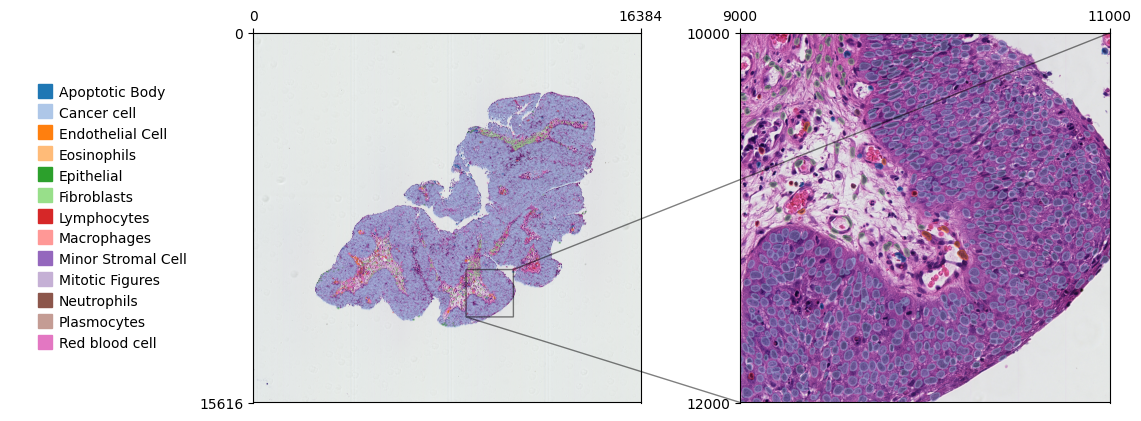

In [30]:
v.add_zoom(9000, 11000, 10000, 12000, cache=False)
v.show()